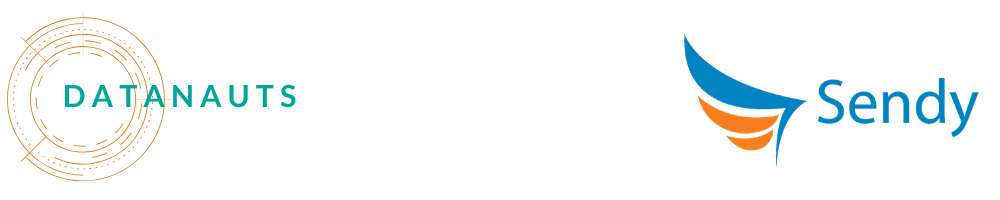

# Sendy Logistics Challenge

Logistics is fundamental to the success of a business. 

It is reported that in Africa, logistics add an average of <a href="https://www.bcg.com/publications/2019/how-online-marketplaces-can-power-employment-africa.aspx">320%</a> to a manufactured good’s cost. Sendy is a logistics platform servicing East Africa and aims to help businesses and enterprises grow through efficient and affordable logistics.

Sendy is trying to predict accurate arrival times that will assist businesses in improving logistic operations and communicate accurate times to customers awaiting deliveries. Data is key in this endeavour and this project aims to use the given data to build and train a model to make these arrival time predictions. practical solutions for Africa’s dynamic transportation needs.

# Import libraries

In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Import Data 

Three .csv files were provided: "Train.csv", "Test.csv" & "Riders.csv". Let's import these datasets.

In [88]:
train_raw = pd.read_csv('Train.csv') #import each .csv file
test_raw = pd.read_csv('Test.csv')
riders_raw = pd.read_csv('Riders.csv')
Var_Def = pd.read_csv('VariableDefinitions.csv')

Great! Let's build a model!

# Exploratory Data Analysis

Hold on! Exploratory Data Analysis is vital in determining our data structure; potential patterns & relationships between the variables in the dataset and ascertaining whether our dataset is in the best format for processing by the model we'll eventually be building. We've divided EDA into the following sections: Completeness, Data Types & Initial Variable Selection & Visualisation. Once we have 'the lay of the land' we'll move on to Preprocessing the datasets. 

## Completeness of the Data
Quality of a dataset is dependent on completeness. Let's investigate which variables have those pesky null values and figure out a way forward to handle them.

In [89]:
train_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21201 entries, 0 to 21200
Data columns (total 29 columns):
Order No                                     21201 non-null object
User Id                                      21201 non-null object
Vehicle Type                                 21201 non-null object
Platform Type                                21201 non-null int64
Personal or Business                         21201 non-null object
Placement - Day of Month                     21201 non-null int64
Placement - Weekday (Mo = 1)                 21201 non-null int64
Placement - Time                             21201 non-null object
Confirmation - Day of Month                  21201 non-null int64
Confirmation - Weekday (Mo = 1)              21201 non-null int64
Confirmation - Time                          21201 non-null object
Arrival at Pickup - Day of Month             21201 non-null int64
Arrival at Pickup - Weekday (Mo = 1)         21201 non-null int64
Arrival at Pickup - Time   

In [90]:
test_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7068 entries, 0 to 7067
Data columns (total 25 columns):
Order No                                7068 non-null object
User Id                                 7068 non-null object
Vehicle Type                            7068 non-null object
Platform Type                           7068 non-null int64
Personal or Business                    7068 non-null object
Placement - Day of Month                7068 non-null int64
Placement - Weekday (Mo = 1)            7068 non-null int64
Placement - Time                        7068 non-null object
Confirmation - Day of Month             7068 non-null int64
Confirmation - Weekday (Mo = 1)         7068 non-null int64
Confirmation - Time                     7068 non-null object
Arrival at Pickup - Day of Month        7068 non-null int64
Arrival at Pickup - Weekday (Mo = 1)    7068 non-null int64
Arrival at Pickup - Time                7068 non-null object
Pickup - Day of Month                   7068 n

In [91]:
riders_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 960 entries, 0 to 959
Data columns (total 5 columns):
Rider Id          960 non-null object
No_Of_Orders      960 non-null int64
Age               960 non-null int64
Average_Rating    960 non-null float64
No_of_Ratings     960 non-null int64
dtypes: float64(1), int64(3), object(1)
memory usage: 37.6+ KB


### Observations
- Both the train & test data sets have missing values for the 'Temperature' & 'Precipitation' columns. The values for the train data should be imputed using an appropriate method after the Train-Validation Split. Approximately 20% of the Temperature values are missing in both the Test & Train data sets. Replacing the NaN with the average would therefore be a reasonable assumption. Approximately 97% of the Precipitation values are missing. Imputation of the NaN values could be achieved either via assuming zero precipitation for those Order times, or imputation by mode. 

- As the data has already been split into training & test sets we can go ahead and imput the values for each set. It's best practice to impute values after the split to ensure a fair test of the model evetually built.

- The riders.csv file has no missing values. Phew!

- Side Note: The column names for the test and train data could do with some formatting to get rid of spaces between strings, but perhaps we'll leave this as is to match the submission file format.

Summary - impute missing temperature and precipitation values. Join riders to both test & train.

## Data Types & Initial Variable Selection

Woah! 29 Variables! Let's take a closer look at what variables could be dropped from each dataset. We'll pay close attention to the any categorical data - specifically 'Order No', 'User Id', 'Vehicle Type', 'Personal or Business', Rider Id and the Various 'Time' data.

Also, how does the Riders data fit into the picture?

In [92]:
train_raw.head()

,Order No,User Id,Vehicle Type,Platform Type,Personal or Business,Placement - Day of Month,Placement - Weekday (Mo = 1),Placement - Time,Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),...,Arrival at Destination - Time,Distance (KM),Temperature,Precipitation in millimeters,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Rider Id,Time from Pickup to Arrival
0,Order_No_4211,User_Id_633,Bike,3,Business,9,5,9:35:46 AM,9,5,...,10:39:55 AM,4,20.4,NaN,-1.317755,36.830370,-1.300406,36.829741,Rider_Id_432,745
1,Order_No_25375,User_Id_2285,Bike,3,Personal,12,5,11:16:16 AM,12,5,...,12:17:22 PM,16,26.4,NaN,-1.351453,36.899315,-1.295004,36.814358,Rider_Id_856,1993
2,Order_No_1899,User_Id_265,Bike,3,Business,30,2,12:39:25 PM,30,2,...,1:00:38 PM,3,NaN,NaN,-1.308284,36.843419,-1.300921,36.828195,Rider_Id_155,455
3,Order_No_9336,User_Id_1402,Bike,3,Business,15,5,9:25:34 AM,15,5,...,10:05:27 AM,9,19.2,NaN,-1.281301,36.832396,-1.257147,36.795063,Rider_Id_855,1341
4,Order_No_27883,User_Id_1737,Bike,1,Personal,13,1,9:55:18 AM,13,1,...,10:25:37 AM,9,15.4,NaN,-1.266597,36.792118,-1.295041,36.809817,Rider_Id_770,1214


In [93]:
test_raw.head()

,Order No,User Id,Vehicle Type,Platform Type,Personal or Business,Placement - Day of Month,Placement - Weekday (Mo = 1),Placement - Time,Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),...,Pickup - Weekday (Mo = 1),Pickup - Time,Distance (KM),Temperature,Precipitation in millimeters,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Rider Id
0,Order_No_19248,User_Id_3355,Bike,3,Business,27,3,4:44:10 PM,27,3,...,3,5:06:47 PM,8,NaN,NaN,-1.333275,36.870815,-1.305249,36.822390,Rider_Id_192
1,Order_No_12736,User_Id_3647,Bike,3,Business,17,5,12:57:35 PM,17,5,...,5,1:25:37 PM,5,NaN,NaN,-1.272639,36.794723,-1.277007,36.823907,Rider_Id_868
2,Order_No_768,User_Id_2154,Bike,3,Business,27,4,11:08:14 AM,27,4,...,4,11:57:54 AM,5,22.8,NaN,-1.290894,36.822971,-1.276574,36.851365,Rider_Id_26
3,Order_No_15332,User_Id_2910,Bike,3,Business,17,1,1:51:35 PM,17,1,...,1,2:16:52 PM,5,24.5,NaN,-1.290503,36.809646,-1.303382,36.790658,Rider_Id_685
4,Order_No_21373,User_Id_1205,Bike,3,Business,11,2,11:30:28 AM,11,2,...,2,11:56:04 AM,6,24.4,NaN,-1.281081,36.814423,-1.266467,36.792161,Rider_Id_858


In [94]:
riders_raw.head()

,Rider Id,No_Of_Orders,Age,Average_Rating,No_of_Ratings
0,Rider_Id_396,2946,2298,14.0,1159
1,Rider_Id_479,360,951,13.5,176
2,Rider_Id_648,1746,821,14.3,466
3,Rider_Id_753,314,980,12.5,75
4,Rider_Id_335,536,1113,13.7,156


### Observations

- The train data set has four additional columns centred arround the arrival time of the order: 'Arrival at Destination - Day of Month', 'Arrival at Destination - Weekday (Mo = 1)', 'Arrival at Destination - Time', 'Time from Pickup to Arrival'. Other than that the columns are identical. This is expected as if we had these columns present in the Test set, we wouldnt have a response variable to predict!

- It appears that the riders data could be joined with both the train and test data sets on the column 'Rider Id'. It is anticipated that some variables in this data set such as 'Average_Rating' could be influential in predicting the response variable. What's that you say...? _"all this does is increase the No. of variables in both sets!"..._ __Yes, but there are definitely some variables that can be removed...__



In [95]:
# Vehicle Type
print(train_raw['Vehicle Type'].value_counts())
print(test_raw['Vehicle Type'].value_counts())

Bike    21201
Name: Vehicle Type, dtype: int64
Bike    7068
Name: Vehicle Type, dtype: int64


__So the only vehicle type included in this dataset is 'Bike'. We could leave this in but it really serves no purpose in the model, so out it goes. What about the Identifier columns like Riders, Orders & User? 'Order No' values corresponds to the number of rows in each dataframe. 'Order No' therefore serves as purely an identifier column and would theoretically serve no purpose in the model. We do however need the Order No's preserved for the submission data file, so instead of dropping the data, we'll extract and store the data in new dataframes. The other Id columns will be dropped completely after merging the dataframes__

In [96]:
# Business or Personal
print(train_raw['Personal or Business'].value_counts())
print(test_raw['Personal or Business'].value_counts())

Business    17384
Personal     3817
Name: Personal or Business, dtype: int64
Business    5780
Personal    1288
Name: Personal or Business, dtype: int64


__It seems that the split of Business to Personal is 80/20. The effect that the type of the order would have on delivery time would need further analysis, so let's keep this for now. The category would have to be _'one hot encoded'_ to a numeric data type but more about that later.__

__Okay, now about those Day of week, Day of Month and Time variables:__

Each data entry reports a Day of Month, Weekday & Time for various stages in the Order process. 
On Visual inspection it seems as though the Day of Month and Weekday that an Order is Placed, Confirmed, Arrival at Pick up, Pick up, Arrival at Destination is the same i.e Same Day Delivery (Wow, well done Sendy!). Let's confirm that and if that is the case, we only need to retain one column of Day of Month & Weekday per category. We'll Check the first stage(Order Placement) with the last available stage for both Datasets (Arrival at Destination).

In [97]:
print((train_raw['Placement - Day of Month'] == train_raw['Pickup - Day of Month']).value_counts())

True     21199
False        2
dtype: int64


Okay, so it seems like our assumption is valid for ~ 99% of the train data. Let's do a quick check on the test data:

In [98]:
print((test_raw['Placement - Day of Month'] == test_raw['Pickup - Day of Month']).value_counts())

True    7068
dtype: int64


Wonderful! That means that all the information relating to Order Stages before 'Pickup' is redundant. It also stands to reason that the only possible time related variables worth keeping when measuring a delivery time, are the ones that measure time from the moment the Order is picked up. In this case we will keep a single 'Day of Month', 'Weekday' and 'Time' column for 'Pickup', which the stage where the driver leaves for delivering the Order. Thats 12 Variables to drop from the train data and 9 from the test data. All that's left to do is convert the 'Pickup - Time' from an object type to a date_time object. Let's create a copy of each datasets to preserve the original raw data and execute the reccomendations above to streamline the dataset for Data Visualisation.

### Recommendations I - First pass at Variable Selection

1. Join Riders data to each dataset.
2. Extract Order columns and preserve in a new dataframe for test and train datasets.
3. Drop Order_ Id. Drop Vehicle Type. Drop all 'Day of Month', 'Weekday' and 'Time' columns except for the 'Pickup' stage.
4. Converting object data types for Pickup Times to date_time 


In [99]:
# Join riders to test & train data and initialise working dataframes

train = train_raw.merge(riders_raw, how="left", on = "Rider Id") #join riders dataframe to train data
test = test_raw.merge(riders_raw, how="left", on = "Rider Id")

In [100]:
# extract Order_Id for later use in submission file
train_orders = train_raw['Order No']
test_order = test_raw['Order No']

In [101]:
# Drop Order No & Vehicle Type. Drop all 'Day of Month', 'Weekday' and 'Time' columns except for the 'Pickup' stage from train_df
train_df = train.drop(['Order No', 'Rider Id', 'User Id', 'Vehicle Type', 'Placement - Day of Month',
       'Placement - Weekday (Mo = 1)', 'Placement - Time',
       'Confirmation - Day of Month', 'Confirmation - Weekday (Mo = 1)',
       'Confirmation - Time', 'Arrival at Pickup - Day of Month',
       'Arrival at Pickup - Weekday (Mo = 1)', 'Arrival at Pickup - Time', 
       'Arrival at Destination - Day of Month',
       'Arrival at Destination - Weekday (Mo = 1)',
       'Arrival at Destination - Time'], axis='columns')

In [102]:
# Drop ID columns & Vehicle Type. Drop all 'Day of Month', 'Weekday' and 'Time' columns except for the 'Pickup' stage from test_df
test_df = test.drop(['Order No', 'User Id', 'Rider Id', 'Vehicle Type', 'Placement - Day of Month',
       'Placement - Weekday (Mo = 1)', 'Placement - Time',
       'Confirmation - Day of Month', 'Confirmation - Weekday (Mo = 1)',
       'Confirmation - Time', 'Arrival at Pickup - Day of Month',
       'Arrival at Pickup - Weekday (Mo = 1)', 'Arrival at Pickup - Time'], axis='columns')

In [103]:
# converting object data types for Pickup Times to date_time 
train_df['Pickup - Time'] = pd.to_datetime(train_df['Pickup - Time'])
test_df['Pickup - Time'] = pd.to_datetime(test_df['Pickup - Time'])

__Great! Let's took a look at our dataframe and check out how we've reduced the variables:__

In [104]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21201 entries, 0 to 21200
Data columns (total 17 columns):
Platform Type                   21201 non-null int64
Personal or Business            21201 non-null object
Pickup - Day of Month           21201 non-null int64
Pickup - Weekday (Mo = 1)       21201 non-null int64
Pickup - Time                   21201 non-null datetime64[ns]
Distance (KM)                   21201 non-null int64
Temperature                     16835 non-null float64
Precipitation in millimeters    552 non-null float64
Pickup Lat                      21201 non-null float64
Pickup Long                     21201 non-null float64
Destination Lat                 21201 non-null float64
Destination Long                21201 non-null float64
Time from Pickup to Arrival     21201 non-null int64
No_Of_Orders                    21201 non-null int64
Age                             21201 non-null int64
Average_Rating                  21201 non-null float64
No_of_Ratings        

In [105]:
train_df.head()

,Platform Type,Personal or Business,Pickup - Day of Month,Pickup - Weekday (Mo = 1),Pickup - Time,Distance (KM),Temperature,Precipitation in millimeters,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Time from Pickup to Arrival,No_Of_Orders,Age,Average_Rating,No_of_Ratings
0,3,Business,9,5,2020-05-22 10:27:30,4,20.4,NaN,-1.317755,36.830370,-1.300406,36.829741,745,1637,1309,13.8,549
1,3,Personal,12,5,2020-05-22 11:44:09,16,26.4,NaN,-1.351453,36.899315,-1.295004,36.814358,1993,396,339,13.6,69
2,3,Business,30,2,2020-05-22 12:53:03,3,NaN,NaN,-1.308284,36.843419,-1.300921,36.828195,455,1023,242,12.5,114
3,3,Business,15,5,2020-05-22 09:43:06,9,19.2,NaN,-1.281301,36.832396,-1.257147,36.795063,1341,886,283,14.5,113
4,1,Personal,13,1,2020-05-22 10:05:23,9,15.4,NaN,-1.266597,36.792118,-1.295041,36.809817,1214,2311,872,14.1,533


__Wait a minute! Those Pickup Times look strange and we still have to take care of those NaN Values...__ 

In [106]:
# Precipitation Analysis
print(train_df['Precipitation in millimeters'].describe())
print(test_df['Precipitation in millimeters'].describe())

count    552.000000
mean       7.905797
std       17.089971
min        0.100000
25%        1.075000
50%        2.900000
75%        4.900000
max       99.100000
Name: Precipitation in millimeters, dtype: float64
count    199.000000
mean       6.651759
std       14.085439
min        0.100000
25%        1.100000
50%        2.900000
75%        4.950000
max       99.100000
Name: Precipitation in millimeters, dtype: float64


As mentioned earlier, approximately 97% of Precipitation data is missing. We could discard the variable as this is a sizeable chunk of data missing. We could also impute the value by assuming that there was zero precipitation on the day and was maybe erroneously not recorded as zero. Let's assume this was true and try to ascertain if there is any correlation to the delivery time. From the plot below we observe that delivery times still vary among the various daily precipitation levels reported. As the test dataset is also largely missing Precipitation values, we take the decision to drop the Variable, 'Precipitation in millimeters' as it seems to just add noise to the data sets. We'd recommend referring back to the Client to see if the data can be attained, or to ensure it is recorded consistently in the future!  

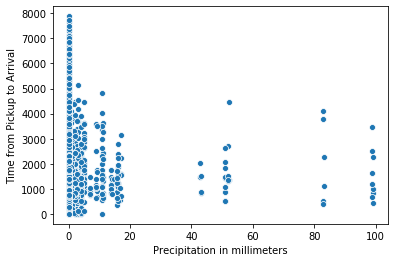

In [107]:
rain = train_df[['Precipitation in millimeters', 'Time from Pickup to Arrival']]
rain['Precipitation in millimeters'].fillna(0, inplace=True)
sns.scatterplot(x='Precipitation in millimeters', y='Time from Pickup to Arrival', data=rain)

__A far more acceptable amount of values are missing for the Temperature variable (Approximately 20%). We'll go ahead and impute this using the mean for each dataset.__ 

## Recommendations II

1. Drop Precipitation column from Train & Test Data set
2. Impute missing Temperature values by mean for train and test datasets

In [108]:
# drop 'Precipitation in millimeters'

train_df = train_df.drop(['Precipitation in millimeters'], axis='columns')
test_df = test_df.drop(['Precipitation in millimeters'], axis='columns')

In [109]:
# Impute 'Temperature' by average

train_df.Temperature.fillna(train_df.Temperature.mean(),inplace=True)
test_df.Temperature.fillna(test_df.Temperature.mean(),inplace=True)

__Missing values have been been taken care of and the dataframes are looking good with the exception of one Column: 'Pickup - Time'. We can easily get rid of the default date that Pandas uses, but we're still left with a problem: time is cyclic and how would we best represent that in a regression model? For now we'll simply extract the hour that the order was picked up, as this could have affect the delivery time considering traffic patterns such as morning, lunchtime and afternoon traffic.__ 

In [110]:
# transform Pickup time to the hour of pickup
train_df['Pickup - Time'] = train_df['Pickup - Time'].apply(lambda time: time.hour)
test_df['Pickup - Time'] = test_df['Pickup - Time'].apply(lambda time: time.hour)

In [111]:
train_df.head()

,Platform Type,Personal or Business,Pickup - Day of Month,Pickup - Weekday (Mo = 1),Pickup - Time,Distance (KM),Temperature,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Time from Pickup to Arrival,No_Of_Orders,Age,Average_Rating,No_of_Ratings
0,3,Business,9,5,10,4,20.400000,-1.317755,36.830370,-1.300406,36.829741,745,1637,1309,13.8,549
1,3,Personal,12,5,11,16,26.400000,-1.351453,36.899315,-1.295004,36.814358,1993,396,339,13.6,69
2,3,Business,30,2,12,3,23.258889,-1.308284,36.843419,-1.300921,36.828195,455,1023,242,12.5,114
3,3,Business,15,5,9,9,19.200000,-1.281301,36.832396,-1.257147,36.795063,1341,886,283,14.5,113
4,1,Personal,13,1,10,9,15.400000,-1.266597,36.792118,-1.295041,36.809817,1214,2311,872,14.1,533


In [112]:
test_df.head()

,Platform Type,Personal or Business,Pickup - Day of Month,Pickup - Weekday (Mo = 1),Pickup - Time,Distance (KM),Temperature,Pickup Lat,Pickup Long,Destination Lat,Destination Long,No_Of_Orders,Age,Average_Rating,No_of_Ratings
0,3,Business,27,3,17,8,23.24612,-1.333275,36.870815,-1.305249,36.822390,439,1511,13.3,171
1,3,Business,17,5,13,5,23.24612,-1.272639,36.794723,-1.277007,36.823907,488,273,14.4,45
2,3,Business,27,4,11,5,22.80000,-1.290894,36.822971,-1.276574,36.851365,833,460,13.1,67
3,3,Business,17,1,14,5,24.50000,-1.290503,36.809646,-1.303382,36.790658,487,560,13.7,44
4,3,Business,11,2,11,6,24.40000,-1.281081,36.814423,-1.266467,36.792161,4761,1120,14.1,1010


# Visualisation

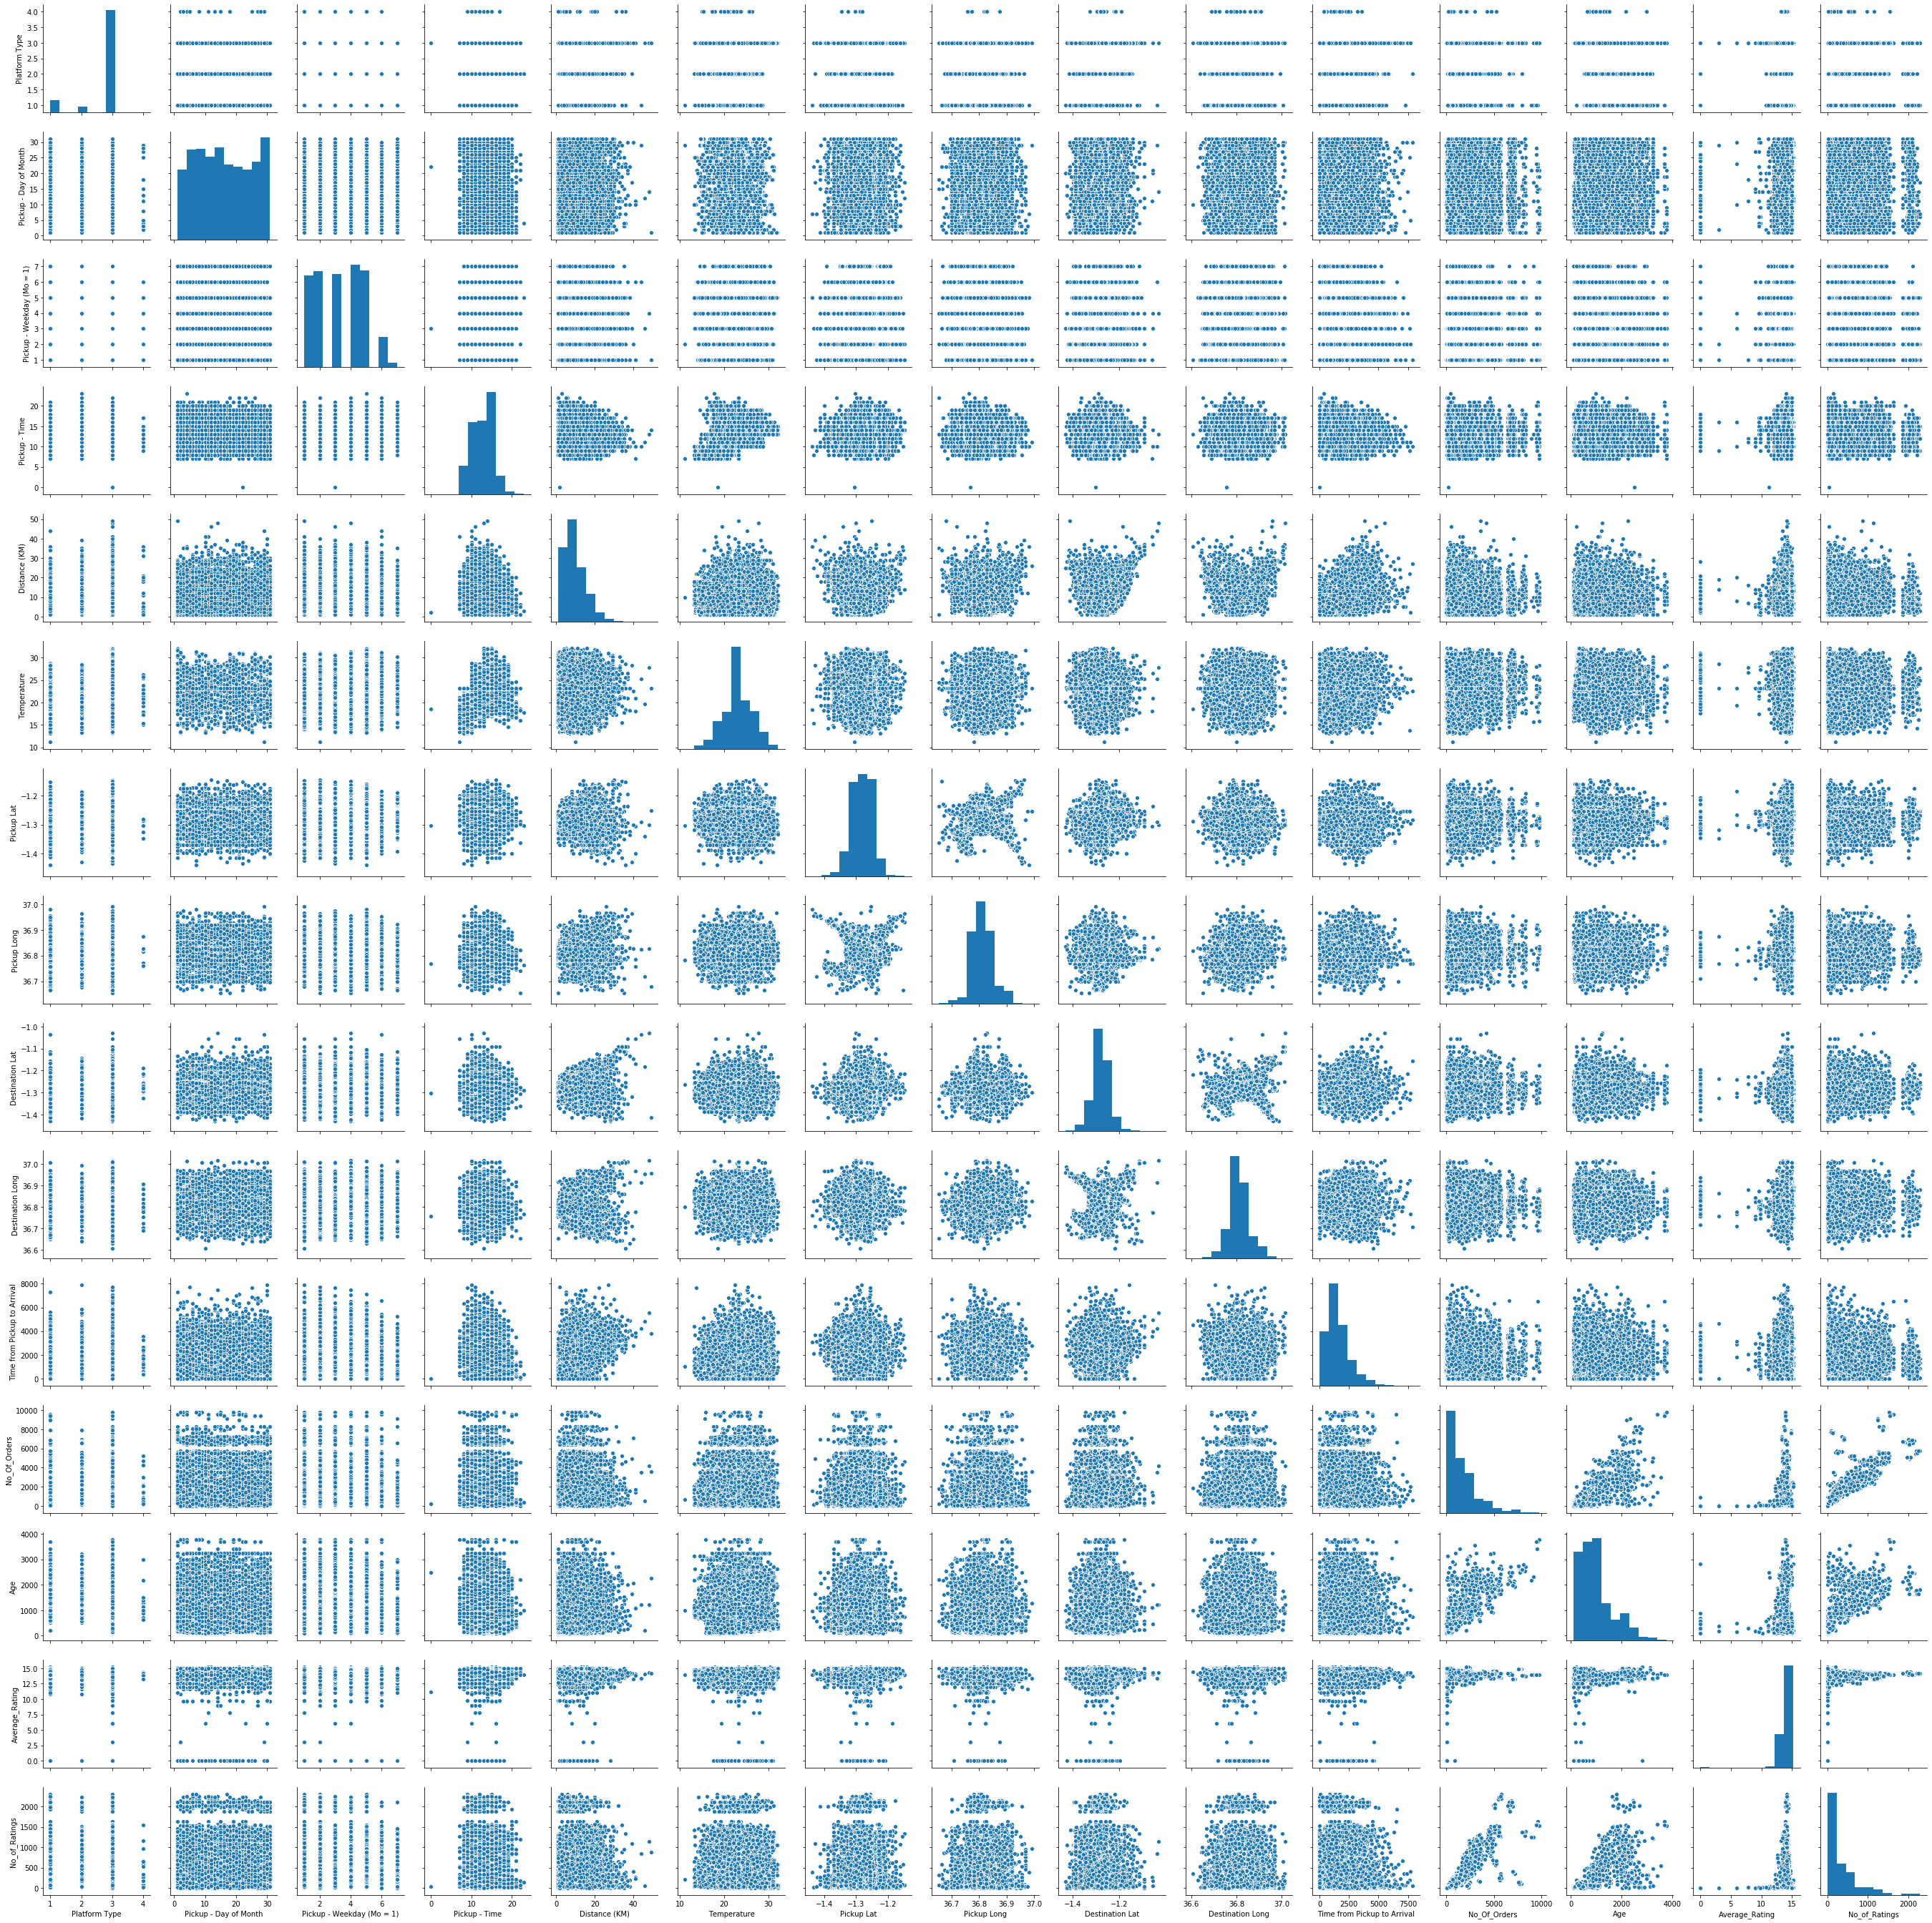

In [113]:
sns.pairplot(train_df)

In [114]:
# Drop Additional columns (justification to be added)

train_df = train_df.drop(['Pickup - Day of Month', 'Pickup - Weekday (Mo = 1)', 'Pickup Lat', 'Pickup Long', 'Destination Lat', 'Destination Long', 'Age', 'No_of_Ratings'], axis='columns')
test_df = test_df.drop(['Pickup - Day of Month', 'Pickup - Weekday (Mo = 1)', 'Pickup Lat', 'Pickup Long', 'Destination Lat', 'Destination Long', 'Age', 'No_of_Ratings'], axis='columns')

## Data Pre-processing

Our data looks great however there are still some issues to take care of before it's ready for modeling.

1. Because we have different variables measured in different units and in different ranges, we need to scale each variable so that the differences in scales do not cause inaccuracies as the model would inherently prioritise variables with higher ranges.

2. Categorical variables like 'Business & Personal' need to be one hot encoded into a numeric form. The dummy variable needs to be dropped to prevent multi-colinearity.

Our approach will be to separate the variables that require encoding from those that need scaling. Note that the predictor variable should not be scaled.

In [116]:
# initialise train predictor variable
train_y = train_df['Time from Pickup to Arrival']

In [117]:
# encode 'Personal or Business' columns
train_encode = pd.get_dummies(train_df, columns=['Personal or Business'], drop_first=True)
test_encode = pd.get_dummies(test_df, columns=['Personal or Business'], drop_first=True)

In [118]:
# preserve encoded variables
train_bp = train_encode['Personal or Business_Personal']
test_bp = test_encode['Personal or Business_Personal']

In [119]:
# Initialise variables to be scaled 
train_scale = train_encode.drop(['Pickup - Time'], axis='columns')
test_scale = test_encode.copy() 

In [120]:
# import sklearn preprocessing transformers
from sklearn.preprocessing import StandardScaler

In [121]:
# create scaler & encoder objects
scaler = StandardScaler()

In [122]:
# scale and encode required columns
train_scaled = scaler.fit_transform(train_scale) 
test_scaled = scaler.fit_transform(test_scale)

In [123]:
# combine scaled and encoded variables for test & train
train_final = pd.DataFrame(train_scaled,columns=train_scale.columns)
test_final = pd.DataFrame(test_scaled,columns=train_scale.columns)

In [124]:
train_final['Personal or Business_Personal'] = train_bp
test_final['Personal or Business_Personal'] = test_bp

In [125]:
train_final.head()

,Platform Type,Distance (KM),Temperature,Time from Pickup to Arrival,No_Of_Orders,Average_Rating,Personal or Business_Personal
0,0.396406,-0.971370,-8.873220e-01,-0.822409,-0.035206,-0.090082,0
1,0.396406,1.145469,9.749159e-01,0.441712,-0.823507,-0.308411,1
2,0.396406,-1.147774,3.969599e-14,-1.116155,-0.425228,-1.509220,0
3,0.396406,-0.089354,-1.259770e+00,-0.218710,-0.512252,0.674069,0
4,-2.802759,-0.089354,-2.439187e+00,-0.347351,0.392929,0.237411,1


In [126]:
test_final.tail()

,Platform Type,Distance (KM),Temperature,Time from Pickup to Arrival,No_Of_Orders,Average_Rating,Personal or Business_Personal
7063,0.397268,-1.112432,-0.799773,0.484816,-0.429189,-0.925443,0
7064,0.397268,0.847942,2.249393,2.325635,3.076615,0.019878,0
7065,0.397268,0.847942,0.097041,0.578417,-0.071241,-0.216452,0
7066,0.397268,0.847942,1.531942,0.110412,-0.916072,0.256208,1
7067,0.397268,1.240017,-0.261685,-0.295192,-0.534179,0.138043,0


# Modeling

We now how have our dataframes ready and processed. There are several regression models we could enlist, so we'll build each type, and then compare the different approaches based on RMSE & other metrics.

## Train-Test Split
Although a test set is available, we will split the train dataset into train-validation test sets for the purposes of gauging model performance.

In [127]:
# assign predictors and response
X = train_final
y = train_y

In [128]:
# split train dataset into (validation)test and train sets
from sklearn.model_selection import train_test_split
X_train, X_vtest, y_train, y_vtest = train_test_split(X, y, test_size=0.20, random_state=101)

## Model training

In [129]:
# import module
from sklearn.linear_model import LinearRegression 
# create model object
lm = LinearRegression()
# train multiple regression model
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [130]:
# import module
from sklearn.tree import DecisionTreeRegressor
# create model object
tree_reg = DecisionTreeRegressor()
# train decision tree regression model 
tree_reg.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [131]:
# train random forest regression model 
from sklearn.ensemble import RandomForestRegressor
# create model object
forest_reg = RandomForestRegressor(n_estimators = 500)
# train random forest regression model 
forest_reg.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=500,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

# Model Evaluation

In [132]:
from sklearn import metrics

In [133]:
# make training set predictions for each model type
y_pred_tr_lm = lm.predict(X_train)
y_pred_tr_dtree = tree_reg.predict(X_train)
y_pred_tr_forest = forest_reg.predict(X_train)

In [134]:
# make test set predictions for each model type
y_pred_vt_lm = lm.predict(X_vtest)
y_pred_vt_dtree = tree_reg.predict(X_vtest)
y_pred_vt_forest = forest_reg.predict(X_vtest)

In [135]:
y_pred_vt_lm

array([1213., 2304., 3959., ..., 1623., 2165.,  919.])

In [136]:
# dictionary of RMSE evaluation
rmse_dict = {'Training MSE':
                    {
                        'Multiple Linear Regression': np.sqrt(metrics.mean_squared_error(y_train, y_pred_tr_lm)),
                        'Decision Tree': np.sqrt(metrics.mean_squared_error(y_train, y_pred_tr_dtree)),
                        'Random Forest': np.sqrt(metrics.mean_squared_error(y_train, y_pred_tr_forest))
                    },
                    'Test MSE':
                    {
                        'Multiple Linear Regression': np.sqrt(metrics.mean_squared_error(y_vtest, y_pred_vt_lm)),
                        'Decision Tree': np.sqrt(metrics.mean_squared_error(y_vtest, y_pred_vt_dtree)),
                        'Random Forest': np.sqrt(metrics.mean_squared_error(y_vtest, y_pred_vt_forest))
                    }
                }

rmse_df = pd.DataFrame(data=rmse_dict)
rmse_df

,Training MSE,Test MSE
Decision Tree,0.000000e+00,2.392119e+00
Multiple Linear Regression,6.184370e-13,6.110514e-13
Random Forest,1.626652e+00,1.318702e+00


In [137]:
# Multiple linear regression
y_pred_lin = lm.predict(test_final)

# Decision Tree regression
y_pred_tree = tree_reg.predict(test_final)

# Random forest regression 
y_pred_forest = forest_reg.predict(test_final)


In [335]:
y_pred_lin
df = pd.DataFrame(data=test_raw['Order No'])
y_pred = pd.DataFrame(data=y_pred_forest, columns=['Time from Pickup to Arrival'])
df['Time from Pickup to Arrival'] = y_pred
df.to_csv("sendyrjrf", index=False)